In [1]:
# create values for the survival analysis
# 1. create a dataframe with the following columns:
#    - patient_id
#    - time
#    - event
#    - age
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import glob
import re
import pickle
import datetime
import time
import random
import math
import scipy
import scipy.stats as stats


In [8]:
data = {
    'patient_id': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'time': [10, 20, 30, 40, 50, 60, 70, 80, 90],
    'event': [1, 0, 1, 0, 1, 0, 1, 0, 1],
    'age': [20, 30, 40, 50, 21, 23, 34, 55, 19]
}
df = pd.DataFrame(data=data)

In [9]:
df.head()

,patient_id,time,event,age
0,1,10,1,20
1,2,20,0,30
2,3,30,1,40
3,4,40,0,50
4,5,50,1,21


<Axes: xlabel='timeline'>

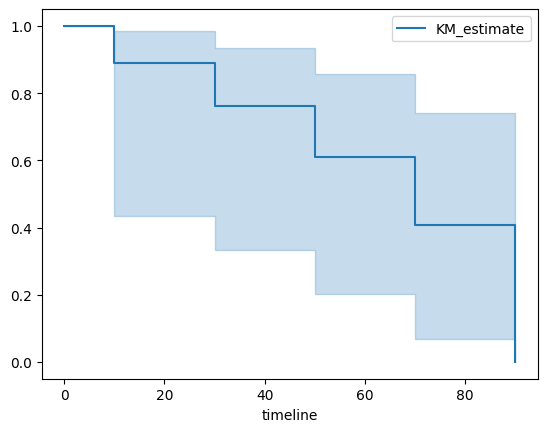

In [10]:
import lifelines
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(df['time'], event_observed=df['event'])
kmf.plot()

In [11]:
# create separate dataframes for each of the 4 groups
# 1. age < 50
# 2. age >= 50
# 3. age < 50 and event = 1
# 4. age >= 50 and event = 1
age_lt_50 = df[df['age'] < 50]
age_ge_50 = df[df['age'] >= 50]
age_lt_50_event = df[(df['age'] < 50) & (df['event'] == 1)]
age_ge_50_event = df[(df['age'] >= 50) & (df['event'] == 1)]


<Axes: xlabel='timeline'>

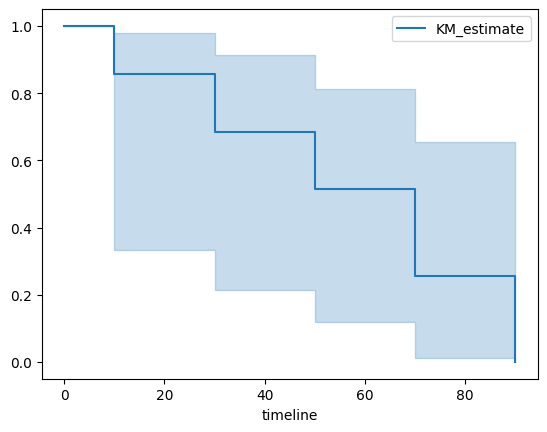

In [13]:
#fit kaplan-meier to each of the 4 groups
kmf = KaplanMeierFitter()
kmf.fit(age_lt_50['time'], event_observed=age_lt_50['event'])
kmf.plot()

<Axes: xlabel='timeline'>

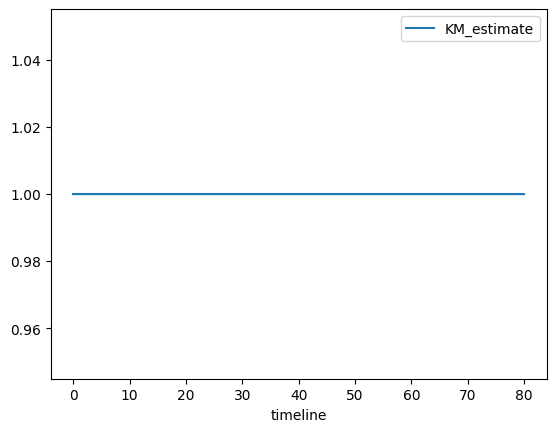

In [14]:
kmf = KaplanMeierFitter()
kmf.fit(age_ge_50['time'], event_observed=age_ge_50['event'])
kmf.plot()

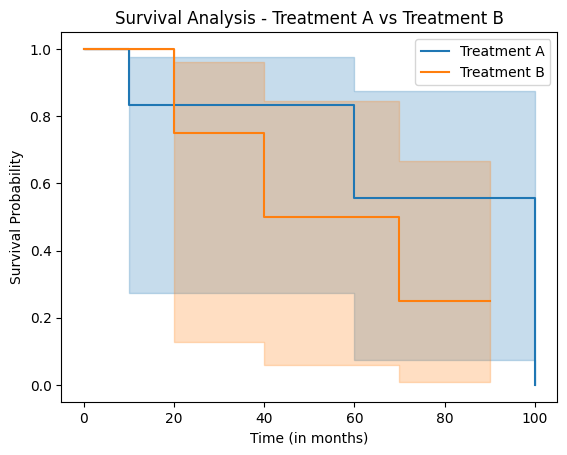

In [15]:
# Create the dataframe
data = {
    'patient_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'time': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'event': [1, 1, 0, 1, 0, 1, 1, 0, 0, 1],
    'age': [45, 62, 38, 50, 72, 58, 66, 41, 55, 60],
    'gender': ['M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'F'],
    'treatment': ['A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A']
}

df = pd.DataFrame(data)

# Create separate dataframes for each treatment group
df_A = df[df['treatment'] == 'A']
df_B = df[df['treatment'] == 'B']

# Fit Kaplan-Meier survival curves for each treatment group
kmf_A = KaplanMeierFitter()
kmf_A.fit(df_A['time'], event_observed=df_A['event'], label='Treatment A')

kmf_B = KaplanMeierFitter()
kmf_B.fit(df_B['time'], event_observed=df_B['event'], label='Treatment B')

# Plot the survival curves
fig, ax = plt.subplots()
kmf_A.plot(ax=ax)
kmf_B.plot(ax=ax)

# Add labels and title
ax.set_xlabel('Time (in months)')
ax.set_ylabel('Survival Probability')
ax.set_title('Survival Analysis - Treatment A vs Treatment B')

# Add legend
ax.legend()

# Display the plot
plt.show()